In [1]:
#Data handling 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

#Deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist


# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Display settings
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU available: {tf.config.list_physical_devices('GPU')}")

TensorFlow version: 2.20.0
GPU available: []


In [ ]:
#Loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # elle sera enregistre dans C:\Users\toumi\.keras\datasets\mnist.npz
# mnist.load_data() returns four arrays:
# x_train : training images
# y_train : labels (0–9) for each training image
# x_test  : test images
# y_test  : labels for each test image


print ("Dataset loaded successfully.") 
print (f"\nTraining data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print (f"\nTesting data shape: {x_test.shape}, Testing labels shape: {y_test.shape}")
print(f"\nImage dimensions: {x_train.shape[1]} x {x_train.shape[2]} pixels")


#x_train: Training images (60,000 × 28 × 28) 
#y_train: Training labels (60,000 numbers: 0-9)
#x_test: Test images (10,000 × 28 × 28)
#y_test: Test labels (10,000 numbers: 0-9)


Dataset loaded successfully.

Training data shape: (60000, 28, 28), Training labels shape: (60000,)

Testing data shape: (10000, 28, 28), Testing labels shape: (10000,)

Image dimensions: 28 x 28 pixels


In [ ]:
print(f"\nPixel value range: [{x_train.min()}, {x_train.max()}]")

print("\nFIRST IMAGE (as numbers)")
print(f"Label: {y_train[0]}")
print("\n First 10*10 pixels of the first image: ")
print(x_train[0][:10, :10])  


Pixel value range: [0, 255]

FIRST IMAGE (as numbers)
Label: 5

 First 10*10 pixels of the first image: 
[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36]
 [  0   0   0   0   0   0   0  49 238 253]
 [  0   0   0   0   0   0   0  18 219 253]
 [  0   0   0   0   0   0   0   0  80 156]]


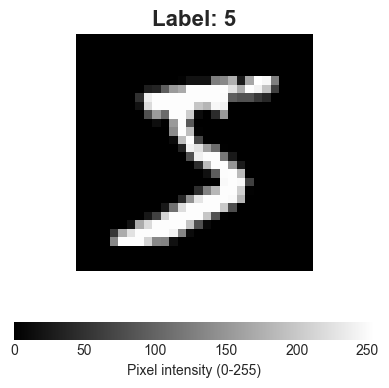

This is the digit: 5


In [ ]:
plt.figure(figsize=(4,4)) 
plt.imshow(x_train[0],cmap='gray') 
plt.title(f"Label: {y_train[0]}",fontsize=16,fontweight='bold') 
plt.colorbar(label="Pixel intensity (0-255)", orientation='horizontal')
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"This is the digit: {y_train[0]}")

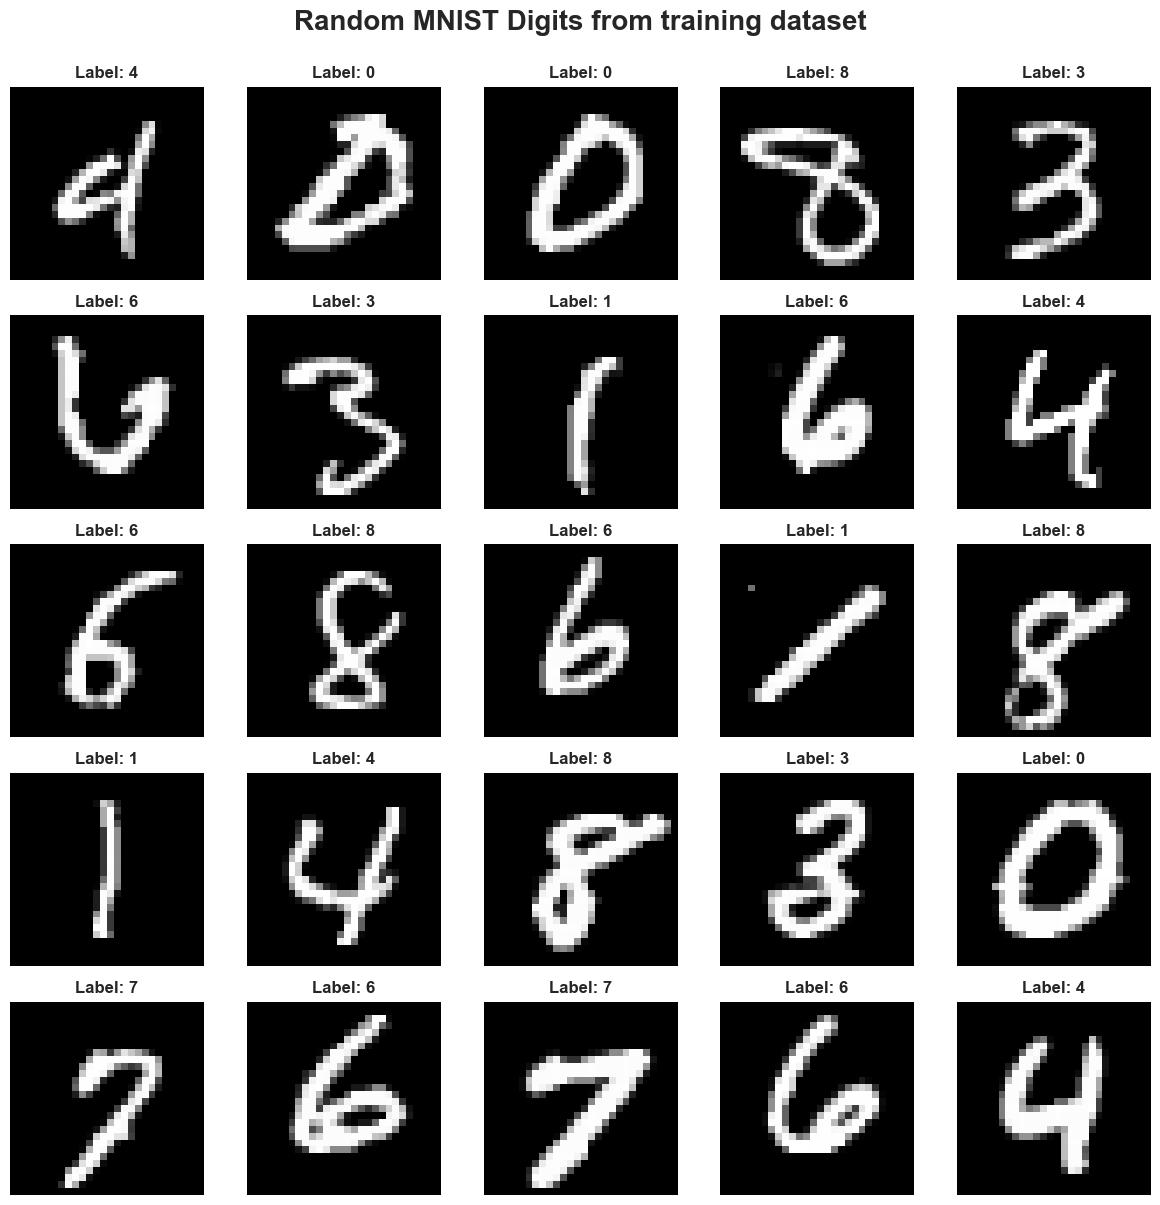

In [ ]:
fig, axes = plt.subplots(5,5, figsize=(12,12)) 
fig.suptitle("Random MNIST Digits from training dataset", fontsize=20, fontweight='bold',y=1.00) 
random_indices = np.random.randint(0,len(x_train), size=25)
for i, ax in enumerate(axes.flat): 
    idx = random_indices[i]
    image = x_train[idx]
    label = y_train[idx]

    ax.imshow(image, cmap='gray') 
    ax.set_title(f"Label: {label}", fontsize=12 , fontweight='bold') 
    ax.axis('off')
plt.tight_layout() 
plt.show()

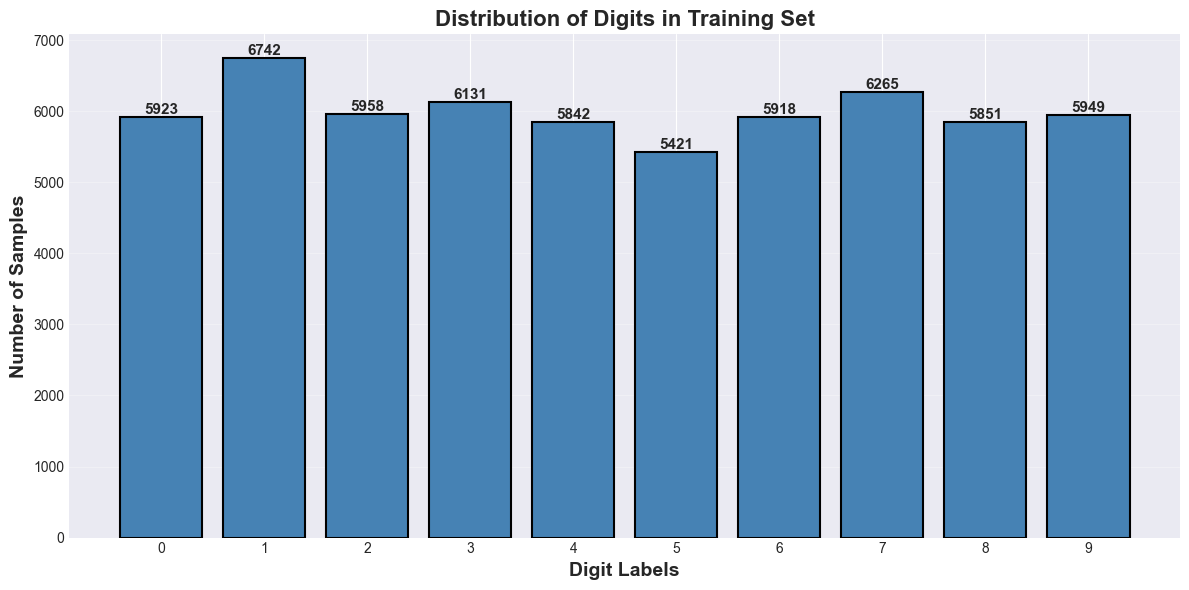


Distribution Statistics:
Digit 0: 5923 samples (9.87%)
Digit 1: 6742 samples (11.24%)
Digit 2: 5958 samples (9.93%)
Digit 3: 6131 samples (10.22%)
Digit 4: 5842 samples (9.74%)
Digit 5: 5421 samples (9.04%)
Digit 6: 5918 samples (9.86%)
Digit 7: 6265 samples (10.44%)
Digit 8: 5851 samples (9.75%)
Digit 9: 5949 samples (9.92%)


In [ ]:
unique_labels, counts = np.unique(y_train, return_counts=True ) 
plt.figure(figsize=(12,6)) 
bars = plt.bar(unique_labels, counts, color='steelblue', edgecolor='black', linewidth=1.5) 

for bar in bars:
    height= bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0,height, f'{int(height)}', ha='center', va='bottom', fontsize=11, fontweight='bold')

    plt.xlabel("Digit Labels", fontsize=14, fontweight='bold')
    plt.ylabel("Number of Samples", fontsize=14, fontweight='bold')

plt.title('Distribution of Digits in Training Set', fontsize=16, fontweight='bold')
plt.xticks(unique_labels)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


print("\nDistribution Statistics:")
for digit, count in zip(unique_labels, counts):
    percentage = (count / len(y_train)) * 100 
    print(f"Digit {digit}: {count} samples ({percentage:.2f}%)")


Pixel Value Statistics:
Mean: 33.32
Std:  78.57
Min:  0
Max:  255


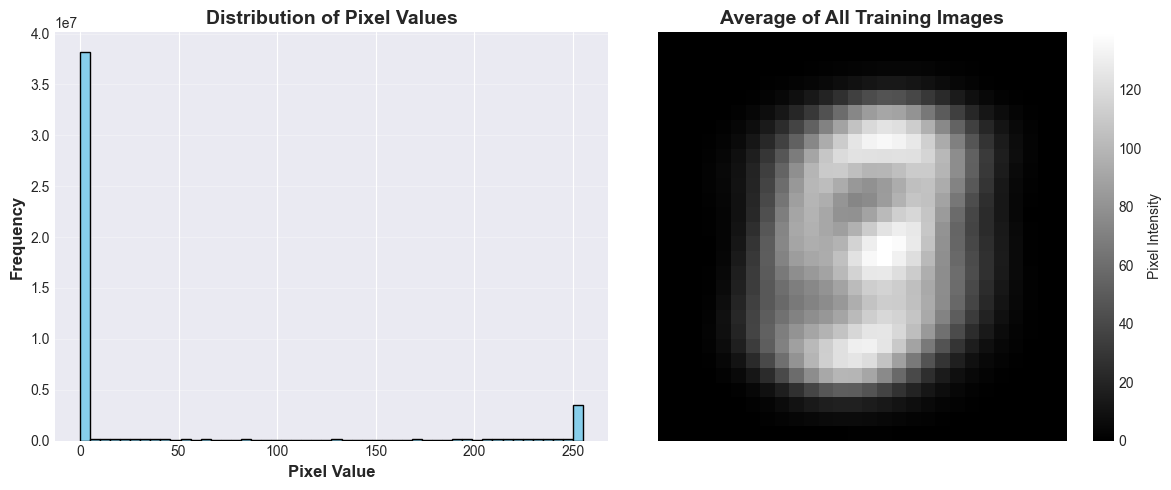

In [ ]:
mean_pixel = x_train.mean() 
std_pixel = x_train.std()
min_pixel = x_train.min()
max_pixel = x_train.max()

print("Pixel Value Statistics:")
print(f"Mean: {mean_pixel:.2f}")
print(f"Std:  {std_pixel:.2f}")
print(f"Min:  {min_pixel}")
print(f"Max:  {max_pixel}")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(x_train.flatten(), bins=50, color='skyblue', edgecolor='black')

plt.xlabel('Pixel Value', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Pixel Values', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1,2,2)
mean_image = x_train.mean(axis=0)
plt.imshow(mean_image, cmap='gray')

plt.title('Average of All Training Images', fontsize=14, fontweight='bold')
plt.colorbar(label='Pixel Intensity')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Find first occurrence of each digit
digit_examples = {}
for i in range(len(y_train)):
    label = y_train[i]
    if label not in digit_examples:
        digit_examples[label] = x_train[i]
    if len(digit_examples) == 10:
        break

# Display them
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Example of Each Digit (0-9)', fontsize=18, fontweight='bold')

for digit in range(10):
    ax = axes[digit // 5, digit % 5]
    ax.imshow(digit_examples[digit], cmap='gray')
    ax.set_title(f'Digit: {digit}', fontsize=14, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()